<a href="https://colab.research.google.com/github/Hansa-Hettiarachchi/Stock_Market_prediction/blob/develop/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [15]:
!pip install yahoo_fin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d3fab1b82fec66e7cda5f8f4af5ad9181914d7c3f38e4cbbb1f551c1826118ad
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=d8a7f0e1f9b5132b645417977dd88a1888b942d1ea10e53ef0f29578822f53df
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k


In [16]:
#import yaho finace library
from yahoo_fin.stock_info import get_data

In [21]:
#Get the stock  data
df= get_data("amzn", start_date="12/04/2013", end_date="12/04/2022")
df

,open,high,low,close,adjclose,volume,ticker
2013-12-04,19.174999,19.484501,19.074499,19.298000,19.298000,47106000,AMZN
2013-12-05,19.332500,19.332500,19.068501,19.224501,19.224501,38130000,AMZN
2013-12-06,19.417500,19.417500,19.191500,19.347500,19.347500,39694000,AMZN
2013-12-09,19.405500,19.410500,19.128500,19.244499,19.244499,55236000,AMZN
2013-12-10,19.187000,19.452999,19.150999,19.389000,19.389000,54736000,AMZN
...,...,...,...,...,...,...,...
2022-11-28,93.930000,96.400002,93.430000,93.949997,93.949997,74943100,AMZN
2022-11-29,94.040001,94.410004,91.440002,92.419998,92.419998,65567300,AMZN
2022-11-30,92.470001,96.540001,91.529999,96.540001,96.540001,102805800,AMZN
2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000,AMZN


In [23]:
df.shape

(2266, 7)

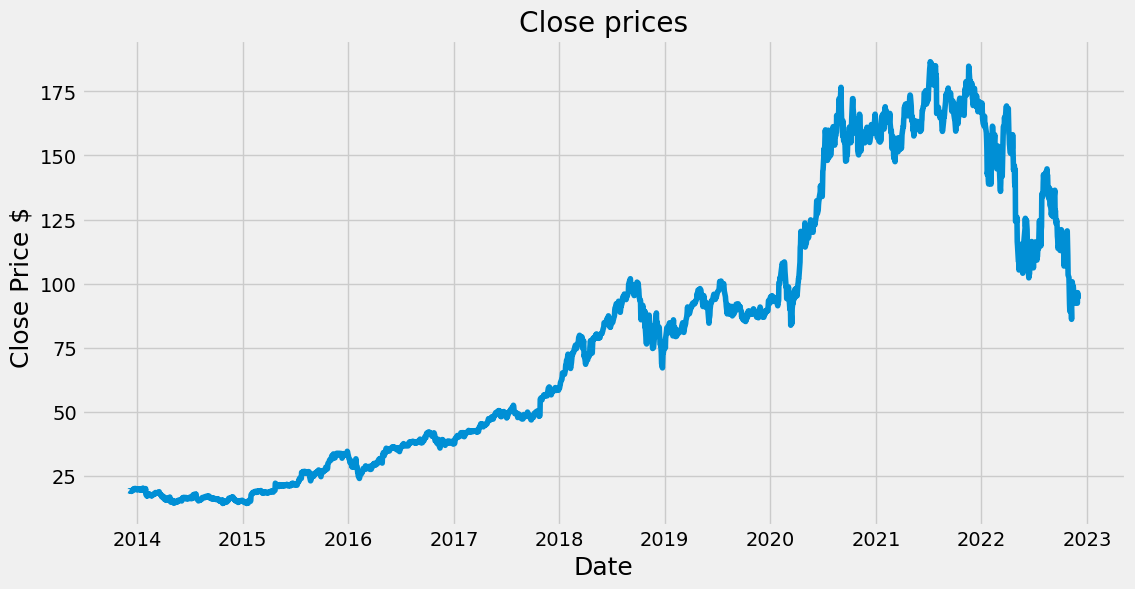

In [30]:
#visualize data
plt.figure(figsize=(12,6))
plt.title('Close prices')
plt.plot(df['close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price $ ', fontsize = 18)
plt.show()

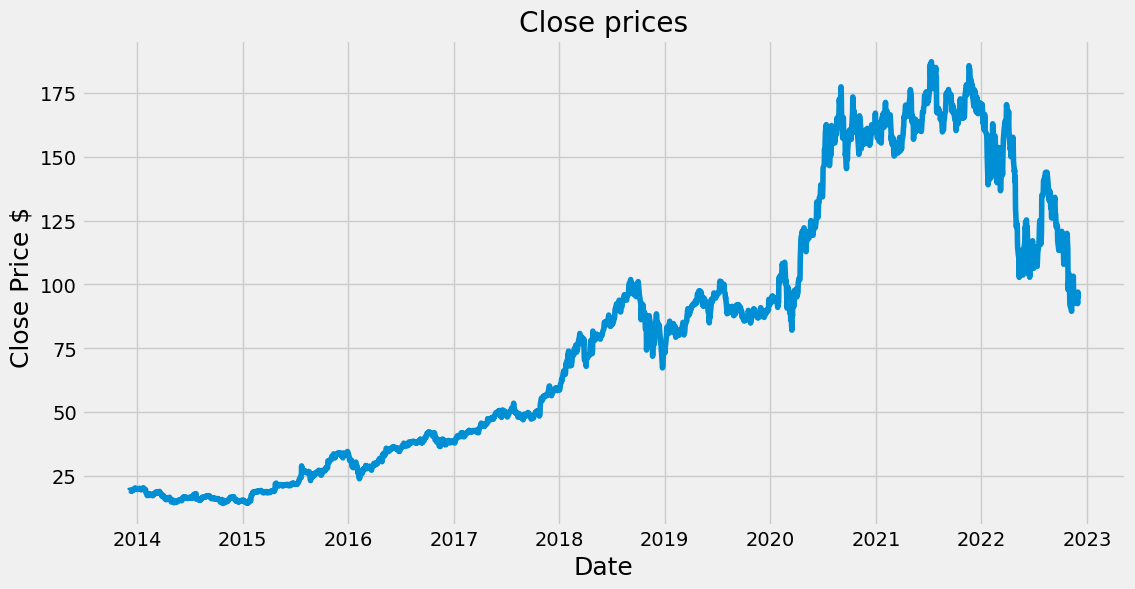

In [28]:
#visualize data
plt.figure(figsize=(12,6))
plt.title('Open prices')
plt.plot(df['open'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open Price $ ', fontsize = 18)
plt.show()

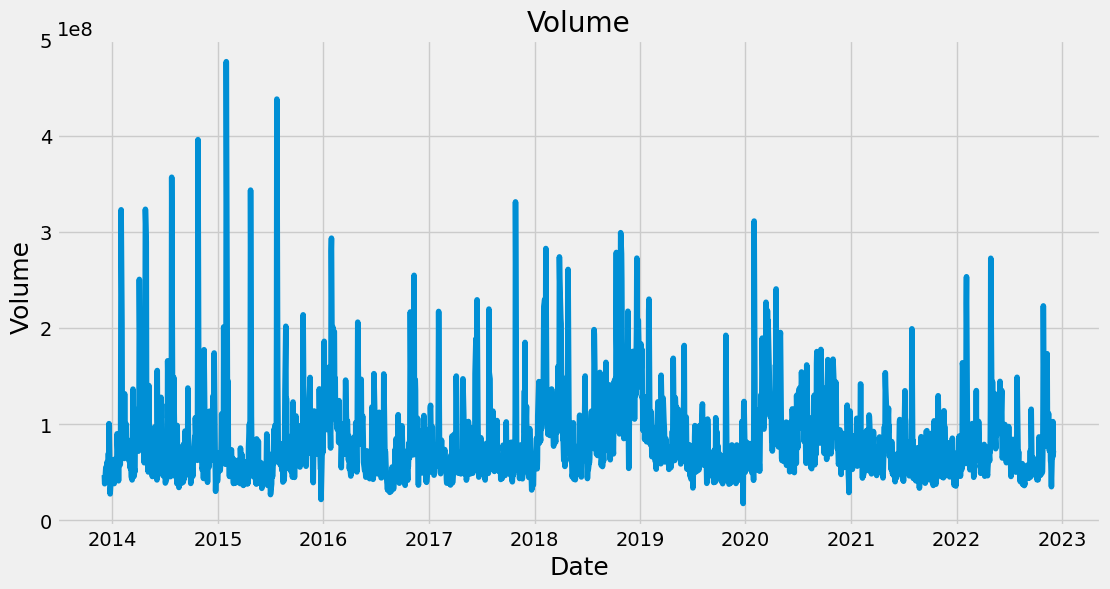

In [31]:
#visualize data
plt.figure(figsize=(12,6))
plt.title('Volume')
plt.plot(df['volume'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Volume ', fontsize = 18)
plt.show()